**Name:** Pranoti Santosh Musmade

**PRN**:123B1B054

**Assignmrnt no.:** 6

**Title:**

An agronomist wants to group different crop samples into clusters based on similarities in soil nutrients and environmental conditions such as nitrogen, phosphorus, potassium, temperature, humidity, pH, and rainfall, without using predefined crop labels.

**Objective:**

1. To apply unsupervised learning techniques for analyzing agricultural data without predefined labels.

2. To group similar crop samples based on soil nutrients and environmental conditions such as nitrogen, phosphorus, potassium, temperature, humidity, pH, and rainfall.

3. To use the K-Means clustering algorithm for identifying natural clusters among different crop types.

4. To interpret and compare the clusters formed with the actual crop labels to evaluate the model’s performance.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Crop_recommendation.csv")

df.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


**Theory:**

**Unsupervised Learning:**

 * Unsupervised learning is a machine learning technique that
works with unlabeled data, meaning the output or target variable is not provided.

* The algorithm identifies hidden patterns or groupings within the data automatically.

* Used to discover structure, relationships, or similarities in data without predefined categories.

* Used to group or simplify data for further analysis.

**Key Techniques:**

**Clustering:** Groups similar data points together based on feature similarity.

Example algorithms: K-Means, Hierarchical Clustering, DBSCAN.


**Dimensionality Reduction:** Reduces the number of variables while retaining essential information.

Example algorithms: PCA (Principal Component Analysis).


**Characteristics:**

* No labeled output (the model learns from the data itself).

* Used mainly for pattern discovery and data exploration.

* Helps understand the natural structure of datasets.

**Applications:**

* Customer segmentation in marketing.

* Image and document clustering.

* Anomaly detection (e.g., fraud detection).

* Market basket analysis.

* Grouping similar environmental or agricultural data (e.g., crop clustering).

**Advantages:**

* Useful when labeled data is unavailable or expensive to obtain.

* Helps in discovering hidden insights and data structure.

* Can be a preprocessing step for supervised learning.

**Limitations:**

* No guarantee that discovered clusters match real-world categories.

* Interpretation of clusters can be subjective.

* Performance evaluation is harder due to absence of labels.

In [ ]:
X = df.drop('label', axis=1) #unlabled data for clustering techniques
y = df['label']

**K-means clustering:**


* K-Means Clustering is an unsupervised learning algorithm used to partition data into K distinct clusters based on feature similarity.

* Points within a cluster are very similar (low distance -> high intra-cluster similarity)

* Points from different clusters are very different (high distance → low inter-cluster similarity).

* The algorithm works by assigning each data point to the nearest cluster centroid and then updating the centroids iteratively until convergence.

* It is computationally efficient and works well for large datasets.

* The value of K (number of clusters) must be predefined, often determined using methods like the Elbow Method or Silhouette Score.

* K-Means assumes clusters are spherical and evenly sized, which may not always fit real-world data.

**Applications:**

* Document similarity

* Social network analysis

* Grouping similar soil or crop samples

**Advantages:**

* No need to predefine the number of clusters.

* Provides a clear hierarchical structure of relationships.

* Easy to visualize using a dendrogram.

**Limitations:**

* Computationally expensive for large datasets.

* Once merged, clusters cannot be split again.

* Sensitive to noise and outliers.

**Elbow Method**

* The Elbow Method is used to find the optimal number of clusters (K) in K-Means clustering.

* It is based on the idea that as we increase the number of clusters, the within-cluster sum of squares (WCSS) decreases.

* WCSS measures the total distance between each point and its assigned cluster centroid.

* When plotted (K vs WCSS), the curve looks like an arm or elbow.

* The "elbow point" — where the rate of decrease sharply slows — represents the optimal number of clusters.

* This point indicates that adding more clusters doesn’t improve clustering quality significantly.

**Silhouette Score**

* The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters.

* It ranges from -1 to +1:

  +1: Data point is well-clustered.

  0: Data point lies on the boundary between two clusters.

  -1: Data point might be assigned to the wrong cluster.

* The average Silhouette Score for all data points indicates overall cluster quality.

* A higher average score means better-defined and more separated clusters.

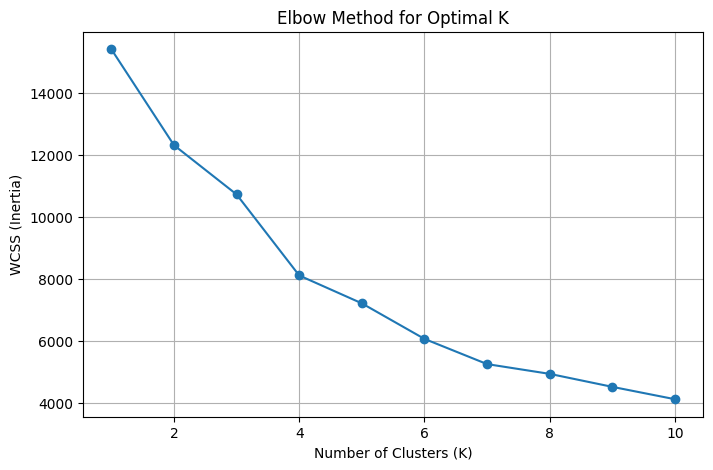

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


#Normalize/scale the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

The WCSS value drops sharply from K = 1 - 6,
 After K = 6, the curve starts to flatten, meaning the improvement in WCSS becomes smaller

 Therefore, the optimal number of clusters (K) is 6.

In [ ]:
#Apply K-Means with optimal number of clusters
k =6
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['cluster'] = labels

#Display sample results
print(df[['label', 'cluster']].head(10))

# check number of samples per cluster
print("\nCluster Counts:")
print(df["cluster"].value_counts())

  label  cluster
0  rice        1
1  rice        1
2  rice        1
3  rice        1
4  rice        1
5  rice        1
6  rice        1
7  rice        1
8  rice        1
9  rice        1

Cluster Counts:
cluster
0    615
2    523
1    334
4    287
5    241
3    200
Name: count, dtype: int64


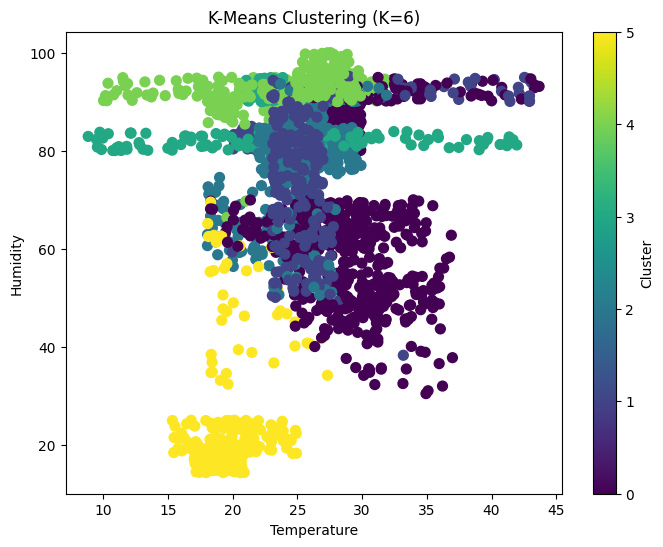

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(8, 6))
plt.scatter(X["temperature"], X["humidity"], c=df["cluster"], cmap="viridis", s=50)
plt.title("K-Means Clustering (K=6)")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# Calculate silhouette score
sil_score = silhouette_score(X_scaled, labels)
print(f"Average Silhouette Score (K={k}): {sil_score:.3f}")

Average Silhouette Score (K=6): 0.313


As Silhouette Score is 0.313, it indicates that cluster quality is Moderate — clusters exist but boundaries are fuzzy.

**Hierarchical Clustering**

* Hierarchical Clustering builds a tree-like structure (dendrogram) to represent the nested grouping of data points.


* It can be of two types: Agglomerative (bottom-up) or Divisive (top-down).


* In Agglomerative Clustering, each data point starts as its own cluster, and pairs of clusters are merged based on similarity measures like Euclidean distance.


* Divisive Clustering begins with all data in one cluster and recursively splits them into smaller clusters.


* It does not require predefining the number of clusters; the cut-off point in the dendrogram determines the number of clusters.


* Hierarchical clustering is easy to interpret but becomes computationally expensive for large datasets.

* Similarity or dissimilarity between clusters is calculated using a distance metric, such as:

  Euclidean distance

  Manhattan distance

  Cosine distance

* The linkage method determines how distances between clusters are computed:

  1. Single Linkage: Minimum distance between any two points of the clusters.

  2. Complete Linkage: Maximum distance between any two points of the clusters.

  3. Average Linkage: Average distance between all pairs of points in the clusters.

  4. Ward’s Linkage: Minimizes the total variance within clusters (most used for numerical data).

* The result is visualized through a dendrogram, which shows how clusters are merged or split at each step.

* The height of each merge on the dendrogram represents the distance (or dissimilarity) between clusters being joined.

* By cutting the dendrogram at a certain height, you can decide the number of clusters to form.

**Advantages:**

* No need to specify the number of clusters beforehand.

* Provides a clear visual (dendrogram) of how clusters form.

* Works well for small to medium-sized datasets.

**Disadvantages:**

* Computationally expensive for large datasets.

* Sensitive to noise and outliers.

* Once clusters are merged or split, the process cannot be undone.


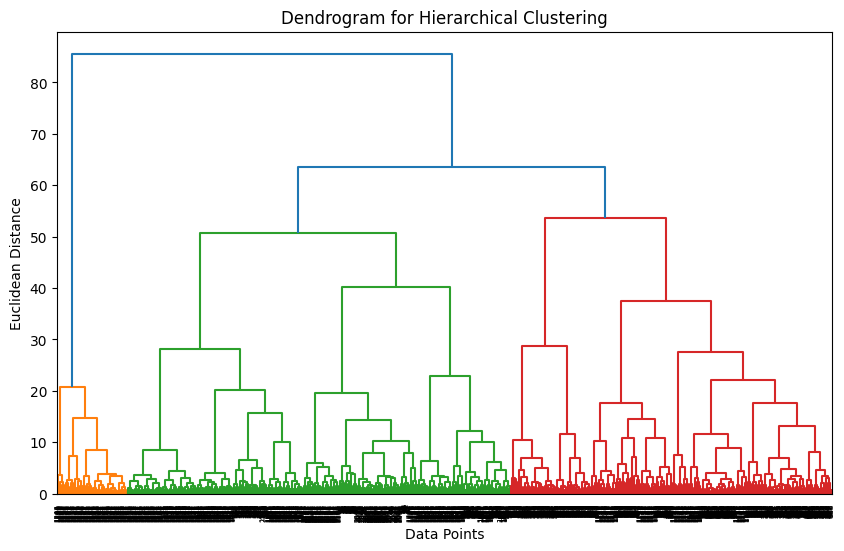

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

#Plot Dendrogram to decide number of clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


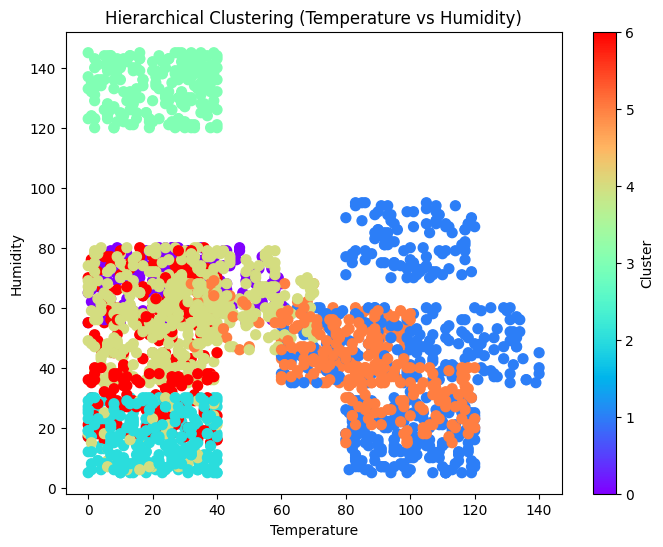

In [ ]:
# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels

#Scatter Plot (Temperature vs Humidity)
plt.figure(figsize=(8,6))
plt.scatter(df['N'], df['P'], c=df['Cluster'], cmap='rainbow', s=50)
plt.title('Hierarchical Clustering (Temperature vs Humidity)')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for K={7}: {sil_score:.3f}")


Silhouette Score for K=7: 0.317


**Self Study:**

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

* DBSCAN is an unsupervised clustering algorithm that groups data points based on density rather than distance (like K-Means or Hierarchical Clustering).

* It identifies clusters as areas of high point density separated by areas of low point density.

* It is especially useful for detecting clusters of arbitrary shapes and handling noise (outliers) effectively.

**Key Concepts**

1. **ε (Epsilon):**

    The radius that defines the neighborhood around a data point.

    Two points are considered neighbors if the distance between them is less than or equal to ε.

2. **MinPts (Minimum Points):**

    The minimum number of points required within a point’s ε-neighborhood to form a dense region (cluster).

3. **Core Point:**

    A point that has at least MinPts points within its ε-neighborhood.

4. **Border Point:**

    A point that is not a core point, but lies within the ε-neighborhood of a core point.

5. **Noise (Outlier):**

    A point that is neither a core point nor a border point — i.e., it doesn’t belong to any cluster.

**Working Steps**

1. Select an arbitrary unvisited point.

2. Find all points within ε distance from it (the neighborhood).

3. If the number of points ≥ MinPts, a cluster is started.

4. The cluster is expanded by including all density-reachable points.

5. Repeat until all points are visited.

**Important Features**

* No need to predefine the number of clusters (K) — it finds the number of clusters automatically.

* Can find clusters of any shape (not just spherical like K-Means).

* Effectively detects outliers, labeling them as noise.

* Works well for spatial and geolocation data.

**Advantages**

* Can handle arbitrary shaped clusters.

* Automatically detects outliers.

* Doesn’t require specifying the number of clusters in advance.

**Disadvantages**

* Choosing ε and MinPts values can be tricky.

* Struggles with varying density clusters.

* Computationally heavy for high-dimensional data.

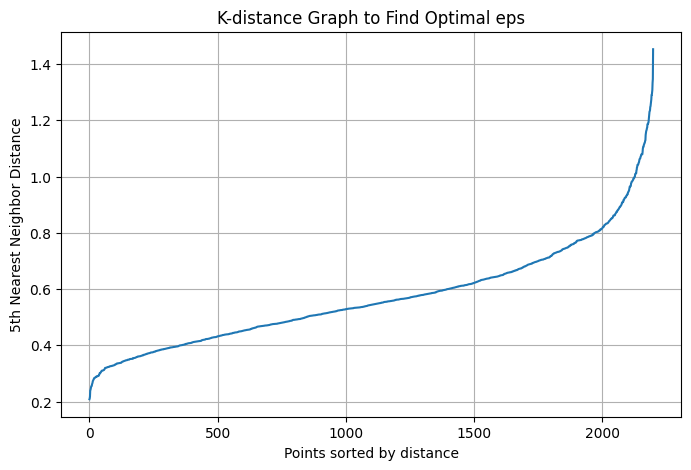

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute k-distance graph (for k = 5)
k = 5
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort distances of the kth nearest neighbor
distances = np.sort(distances[:, k-1])

# Plot the k-distance graph to visualize elbow
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("K-distance Graph to Find Optimal eps")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


In [ ]:
# Use eps value based on elbow observation
optimal_eps = 1.3  #  value from the graph where elbow value increses
min_samples = 5

dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

# Evaluate clustering
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

if n_clusters > 1:
    sil_score = silhouette_score(X_scaled, labels)
else:
    sil_score = -1  # Silhouette not valid if only 1 cluster

print(f"Optimal eps: {optimal_eps}")
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Silhouette Score: {sil_score:.3f}")


Optimal eps: 1.3
Number of clusters found: 2
Number of noise points: 0
Silhouette Score: 0.417


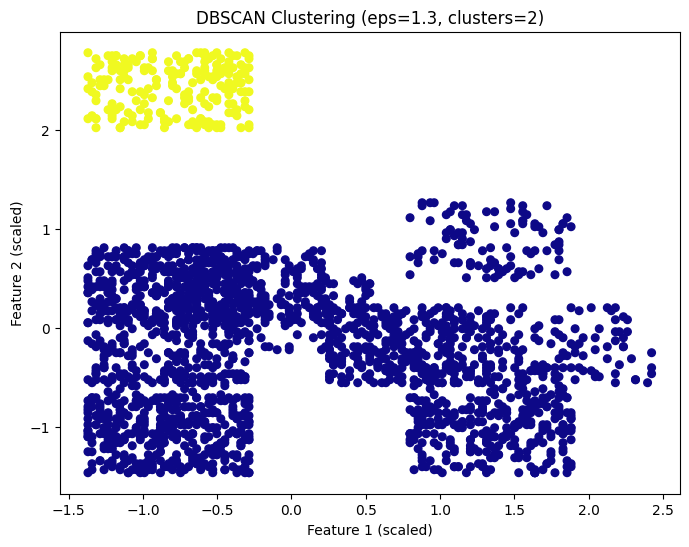

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma', s=30)
plt.title(f"DBSCAN Clustering (eps={optimal_eps}, clusters={n_clusters})")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

**Evaluation matrix:**

**1.Silhouette Score**

* Measures how similar each data point is to its own cluster compared to other clusters.

* It shows how well each object lies within its cluster.

* The score ranges between -1 and +1:

  +1 → The sample is very well matched to its cluster.

  0 → The sample is on or very close to the decision boundary between clusters.

  -1 → The sample might be assigned to the wrong cluster.

* A higher Silhouette Score means the clusters are well-separated and meaningful.

**2.Calinski–Harabasz Index**

* Also known as the Variance Ratio Criterion.

* It measures how well the clusters are separated and how compact they are internally.

* The index considers the ratio of the spread between clusters to the spread within clusters.

* A higher Calinski–Harabasz score indicates that the clusters are dense, distinct, and better formed.

* It’s often used to determine the optimal number of clusters in a dataset.

**3.Davies–Bouldin Index**

* Measures the average similarity between clusters, where similarity is a comparison of the distance between clusters with the size of the clusters themselves.

* It evaluates both the compactness within clusters and the separation between clusters.

* A lower Davies–Bouldin score indicates better clustering because it means clusters are compact and well-separated.

* This metric helps to identify if clusters overlap or if some clusters are too spread out.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define clustering models
models = {
    "K-Means (k=6)": KMeans(n_clusters=6, random_state=42),
    "Hierarchical (k=7)": AgglomerativeClustering(n_clusters=7),
    "DBSCAN": DBSCAN(eps=1.3, min_samples=5)
}

# Evaluate all models
for name, model in models.items():
    labels = model.fit_predict(X_scaled)

    # Ignore metrics if model finds < 2 clusters (for DBSCAN)
    if len(set(labels)) <= 1:
        print(f"{name}: Not enough clusters formed.\n")
        continue

    print(f"\n{name} Metrics:")
    print("Silhouette Score:", round(silhouette_score(X_scaled, labels), 3))
    print("Calinski-Harabasz Score:", round(calinski_harabasz_score(X_scaled, labels), 3))
    print("Davies-Bouldin Score:", round(davies_bouldin_score(X_scaled, labels), 3))



K-Means (k=6) Metrics:
Silhouette Score: 0.313
Calinski-Harabasz Score: 676.101
Davies-Bouldin Score: 1.211

Hierarchical (k=7) Metrics:
Silhouette Score: 0.317
Calinski-Harabasz Score: 661.085
Davies-Bouldin Score: 1.219

DBSCAN Metrics:
Silhouette Score: 0.417
Calinski-Harabasz Score: 685.725
Davies-Bouldin Score: 0.797


**Conclusion:**

Based on the obtained results, it can be concluded that among the three clustering algorithms — K-Means, Hierarchical, and DBSCAN — the DBSCAN algorithm provides the best clustering performance for the given dataset. The evaluation metrics show that DBSCAN achieved the highest Silhouette Score (0.417), indicating that the clusters are well-separated and the data points within each cluster are closely grouped. It also recorded the lowest Davies–Bouldin Score (0.797), which further confirms that the clusters formed are compact and distinct from one another. Additionally, the Calinski–Harabasz Score (685.73) for DBSCAN is slightly higher than the other methods, showing good inter-cluster separation and intra-cluster compactness.

In comparison, both K-Means (k=6) and Hierarchical Clustering (k=7) produced moderate results, with similar Silhouette and Davies–Bouldin scores, indicating that their clusters are not as well-defined. Unlike K-Means and Hierarchical clustering, DBSCAN does not require specifying the number of clusters beforehand and can effectively identify noise and outliers in the dataset. Therefore, it can be concluded that DBSCAN is the most suitable clustering method for this dataset, providing better-defined, meaningful, and natural clusters compared to the other two techniques.